### Import Dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
#test = pd.read_csv('test.csv')
stores = pd.read_csv('/content/drive/MyDrive/stores.csv')
features = pd.read_csv('/content/drive/MyDrive/features.csv')

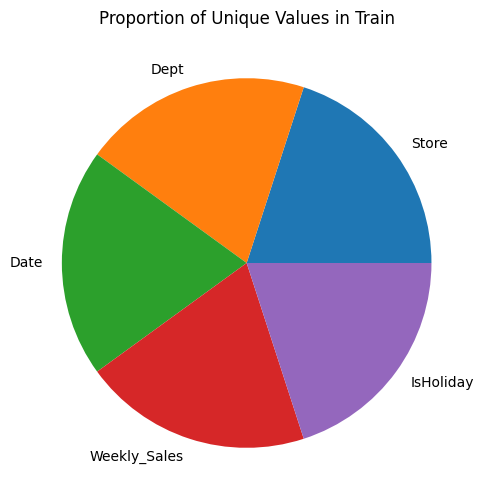

In [10]:
column_names = train.columns
column_counts = [1] * len(column_names)

# Create a DataFrame for visualization
column_df = pd.DataFrame({'Column': column_names, 'Count': column_counts})
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(column_df['Count'], labels=column_df['Column'])
plt.title('Proportion of Unique Values in Train')

# Display the plot
plt.show()

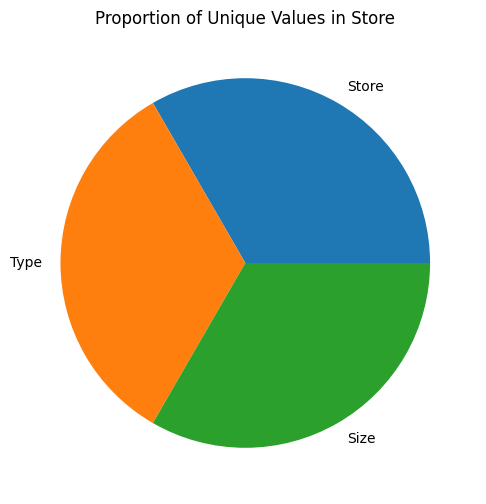

In [11]:
column_names = stores.columns
column_counts = [1] * len(column_names)

# Create a DataFrame for visualization
column_df = pd.DataFrame({'Column': column_names, 'Count': column_counts})
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(column_df['Count'], labels=column_df['Column'])
plt.title('Proportion of Unique Values in Store')

# Display the plot
plt.show()

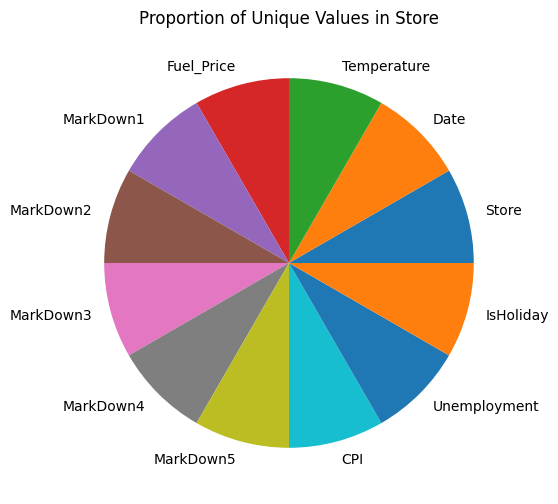

In [12]:
column_names = features.columns
column_counts = [1] * len(column_names)

# Create a DataFrame for visualization
column_df = pd.DataFrame({'Column': column_names, 'Count': column_counts})
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(column_df['Count'], labels=column_df['Column'])
plt.title('Proportion of Unique Values in Store')

# Display the plot
plt.show()

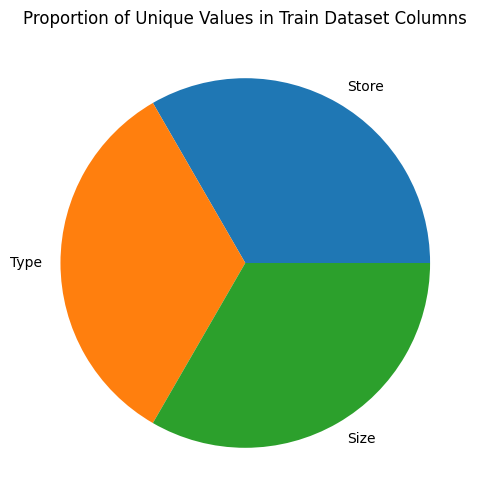

In [13]:
column_names = stores.columns
column_counts = [1] * len(column_names)

# Create a DataFrame for visualization
column_df = pd.DataFrame({'Column': column_names, 'Count': column_counts})
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(column_df['Count'], labels=column_df['Column'])
plt.title('Proportion of Unique Values in Train Dataset Columns')

# Display the plot
plt.show()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [15]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


### Data Prepocessing

In [16]:
# create year, month, and date
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
train['month'] = train['Date'].apply(lambda i : i.month)
train['day'] = train['Date'].apply(lambda i : i.day)
train['year'] =train['Date'].apply(lambda i : i.year)
train['week'] = train['Date'].apply(lambda i : i.week)

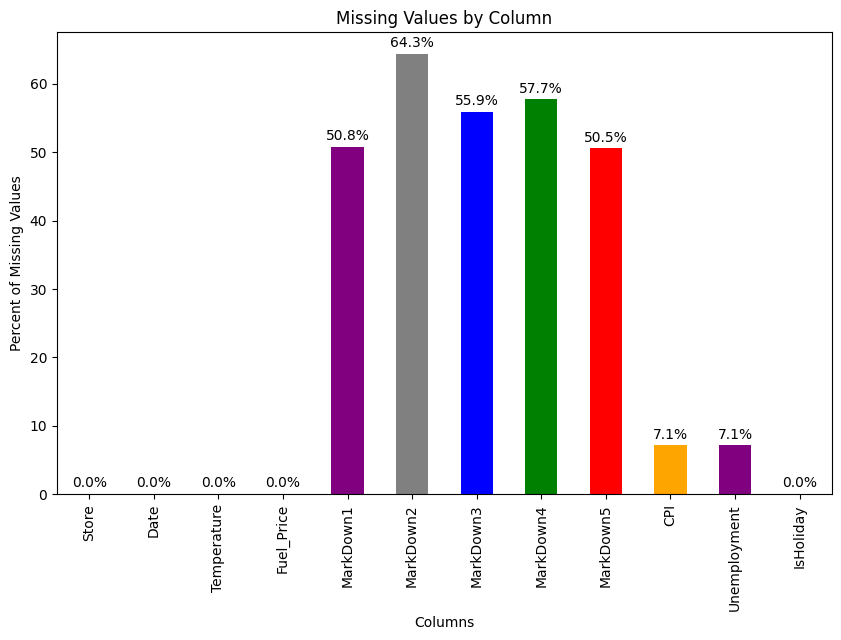

In [17]:
# check the missing values
# calculate the percentage of missing values in each column
missing_percent = features.isnull().mean() * 100

colors = ['blue', 'green', 'red', 'orange', 'purple', 'gray']

# create a bar plot of the percentage of missing values for each column
ax = missing_percent.plot(kind='bar', figsize=(10, 6),color = colors)

for i, v in enumerate(missing_percent):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

# set the labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Percent of Missing Values')
ax.set_title('Missing Values by Column')

# show the plot
plt.show()

In [18]:
median = features.median()
features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
features[['CPI','Unemployment']] = features[['CPI','Unemployment']].fillna(median)
features

<ipython-input-18-ae383b382a64>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median = features.median()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,False


In [19]:
train.describe()

,Store,Dept,Weekly_Sales,month,day,year,week
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,6.449510,15.673131,2010.968591,25.826762
std,12.785297,30.492054,22711.183519,3.243217,8.753549,0.796876,14.151887
min,1.000000,1.000000,-4988.940000,1.000000,1.000000,2010.000000,1.000000
25%,11.000000,18.000000,2079.650000,4.000000,8.000000,2010.000000,14.000000
50%,22.000000,37.000000,7612.030000,6.000000,16.000000,2011.000000,26.000000
75%,33.000000,74.000000,20205.852500,9.000000,23.000000,2012.000000,38.000000
max,45.000000,99.000000,693099.360000,12.000000,31.000000,2012.000000,52.000000


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   month         421570 non-null  int64         
 6   day           421570 non-null  int64         
 7   year          421570 non-null  int64         
 8   week          421570 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6)
memory usage: 26.1 MB


In [21]:
# mergethe dataset
a = ['Store']
features = features.merge(stores,how='inner',on = a)
train = train.merge(features,how = 'inner', on = ['Store','Date','IsHoliday'])

In [22]:
train.sort_values(by=['Date'],inplace=True)
train.set_index(train.Date, inplace=True)

In [23]:
# remove all the negative weekly sales
train = train[train.Weekly_Sales > 0]

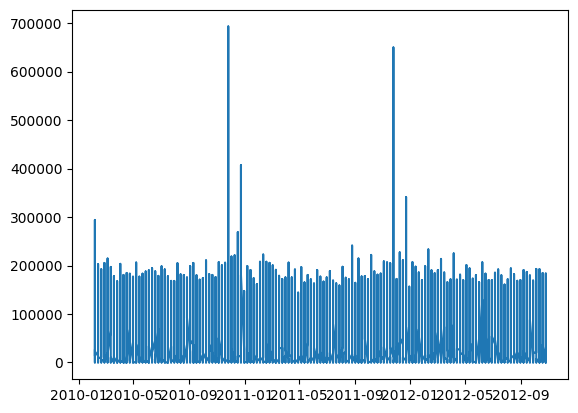

In [24]:
plt.plot(train['Weekly_Sales'])

In [25]:
# for col in train.columns:
#     # calculate the lower and upper bounds for outliers
#     if type(train[col]) == float or type(train[col]) == int:
#         q1 = train[col].quantile(0.25)
#         q3 = train[col].quantile(0.75)
#         iqr = q3 - q1
#         lower_bound = q1 - 1.5 * iqr
#         upper_bound = q3 + 1.5 * iqr
#         # remove any values outside of the lower and upper bounds
#         train = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]

# # show the modified DataFrame
# print(train)


In [26]:
train.shape

(420212, 20)

In [27]:
# from scipy import stats
# numerics = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
# datas = train[numerics].copy()
# z_scores = stats.zscore(train[numerics])   
# mask = (z_scores < 3).all(axis=1)
# train = train[mask]



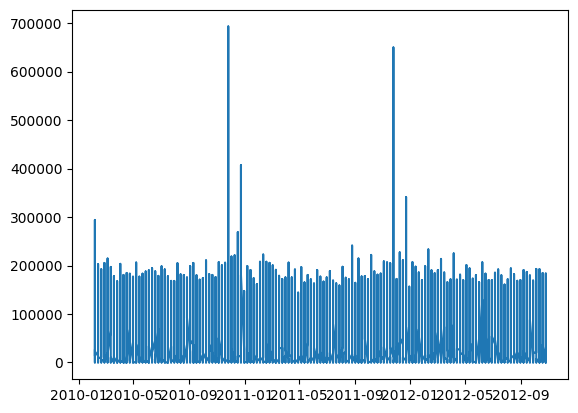

In [28]:
plt.plot(train['Weekly_Sales'])

In [29]:
train.shape

(420212, 20)

In [30]:
train.shape

(420212, 20)

In [31]:
train.Weekly_Sales

Date
2010-02-05    24924.50
2010-02-05    14612.19
2010-02-05    26323.15
2010-02-05    36414.63
2010-02-05    11437.81
                ...   
2012-10-26     7770.71
2012-10-26     1486.00
2012-10-26     4738.93
2012-10-26    32699.78
2012-10-26     1076.80
Name: Weekly_Sales, Length: 420212, dtype: float64

### Data Visualization

<ipython-input-32-72e3a48f6955>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.groupby('week').sum()


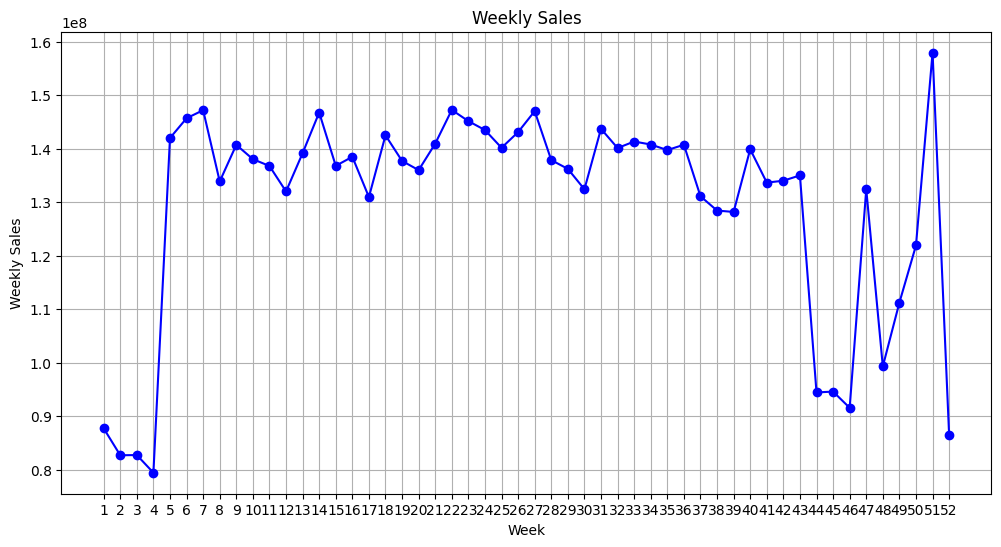

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


weekly = train.groupby('week').sum()

x = weekly.index
y = weekly['Weekly_Sales']

plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-', color='blue')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.xticks(x)
plt.grid(True)
plt.show()

<ipython-input-33-bc8aa3e7312b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.groupby(['week', 'year']).mean()['Weekly_Sales']


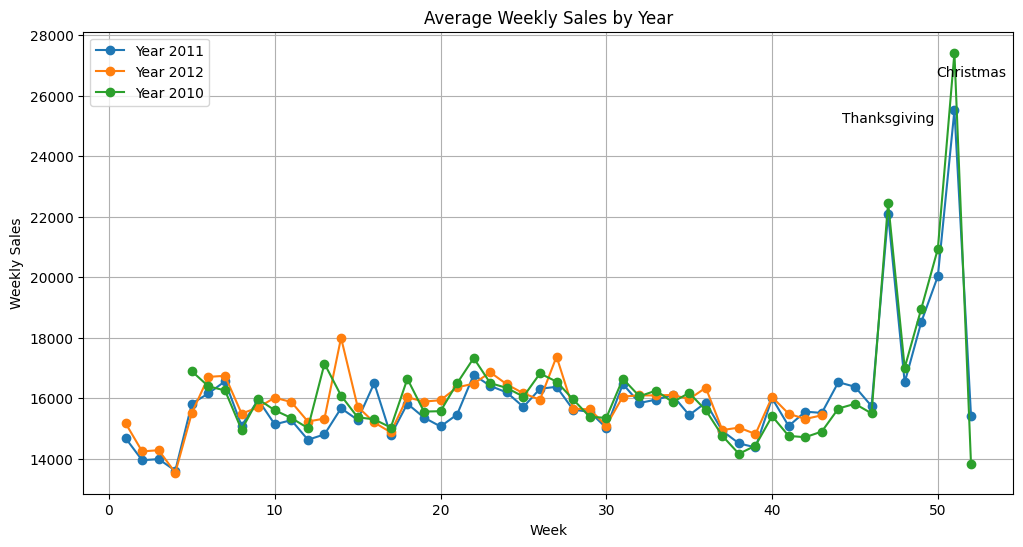

In [33]:
# Group the data by week and year and calculate the sum of weekly sales
weekly = train.groupby(['week', 'year']).mean()['Weekly_Sales']
plt.figure(figsize=(12, 6))
# Iterate over unique years and plot a line for each year
for year in weekly.index.get_level_values('year').unique():
    year_data = weekly.loc[:, year]
    plt.plot(year_data.index, year_data.values, marker='o', linestyle='-', label=f'Year {year}')
    
plt.title('Average Weekly Sales by Year')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)

thanksgiving_week = 47  # Adjust the week number for Thanksgiving
christmas_week = 52  # Adjust the week number for Christmas

plt.text(thanksgiving_week, 25000, 'Thanksgiving', ha='center', va='bottom', fontsize=10)
plt.text(christmas_week, 27000, 'Christmas', ha='center', va='top', fontsize=10)

plt.show()

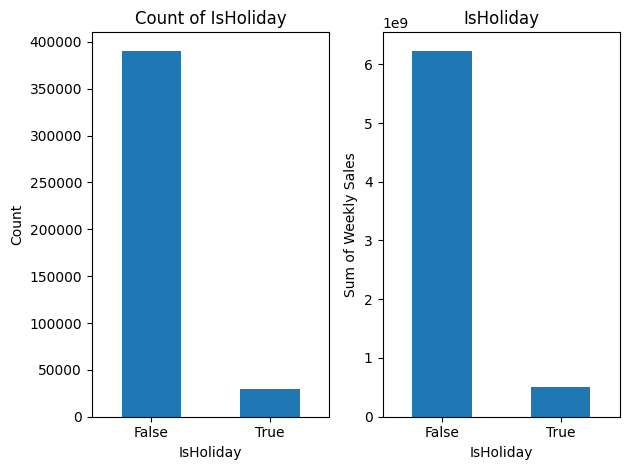

In [34]:
# Count of IsHoliday
plt.subplot(1, 2, 1)
train['IsHoliday'].value_counts().plot(kind='bar')
plt.title('Count of IsHoliday')
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Sum of Weekly_Sales by IsHoliday
plt.subplot(1, 2, 2)
train.groupby('IsHoliday')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('IsHoliday')
plt.xlabel('IsHoliday')
plt.ylabel('Sum of Weekly Sales')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

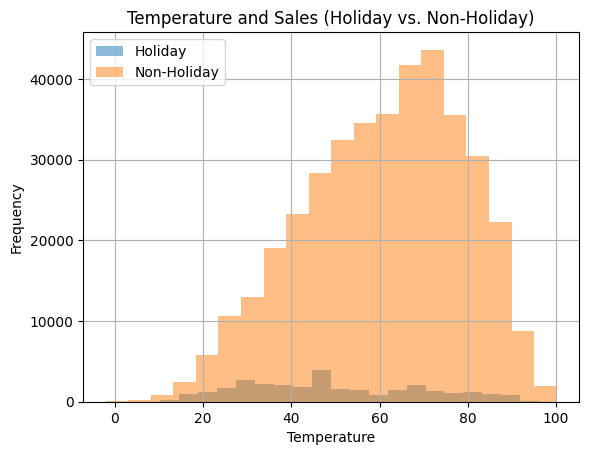

In [35]:
# Separate the data for holiday and non-holiday weeks
holiday_data = train[train['IsHoliday'] == 1]
non_holiday_data = train[train['IsHoliday'] == 0]

# Plot the histogram for Temperature and Sales for holiday weeks
plt.hist(holiday_data['Temperature'], bins=20, alpha=0.5, label='Holiday')
plt.hist(non_holiday_data['Temperature'], bins=20, alpha=0.5, label='Non-Holiday')

plt.title('Temperature and Sales (Holiday vs. Non-Holiday)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()


In [36]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,month,day,year,week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,2,5,2010,5,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2010-02-05,35,3,2010-02-05,14612.19,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,4,2010-02-05,26323.15,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,5,2010-02-05,36414.63,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,6,2010-02-05,11437.81,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,49,2012-10-26,7770.71,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622
2012-10-26,13,50,2012-10-26,1486.00,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622
2012-10-26,13,52,2012-10-26,4738.93,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622


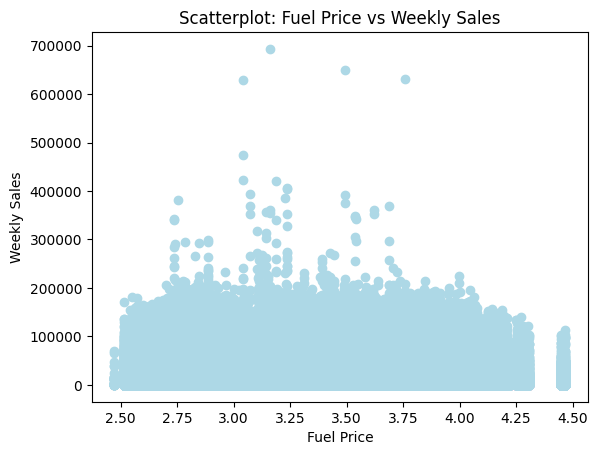

In [37]:

# Plot scatterplot
plt.scatter(train['Fuel_Price'], train['Weekly_Sales'], color='lightblue')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Scatterplot: Fuel Price vs Weekly Sales')
plt.show()


In [38]:
sales = train.groupby('IsHoliday')['Weekly_Sales'].mean()
counts = train.IsHoliday.value_counts()
print(sales)
print(counts)

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64
False    390652
True      29560
Name: IsHoliday, dtype: int64


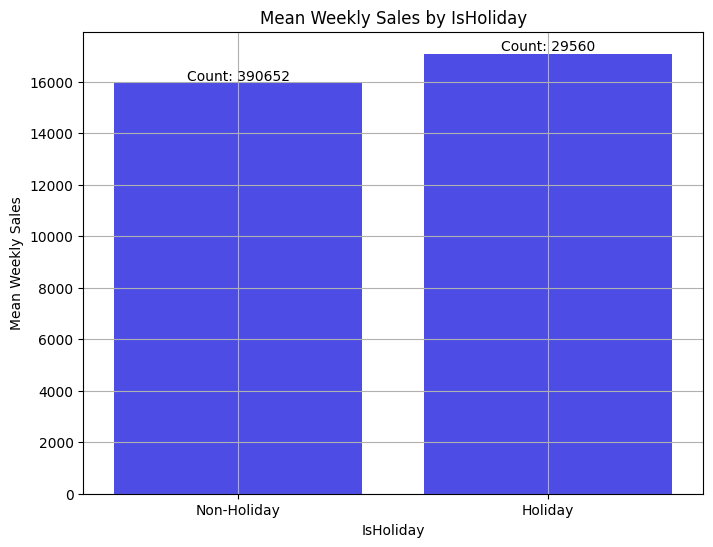

In [39]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sales.index, y=sales.values, color='blue', alpha=0.8)
plt.xlabel('IsHoliday')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales by IsHoliday')
plt.xticks(range(len(sales)), ['Non-Holiday', 'Holiday'])  # Assuming '0' represents Non-Holiday and '1' represents Holiday
plt.grid(True)

# Add count values on top of the bars
for i, count in enumerate(counts.values):
    plt.text(i, sales.values[i], f'Count: {count}', ha='center', va='bottom')

plt.show()

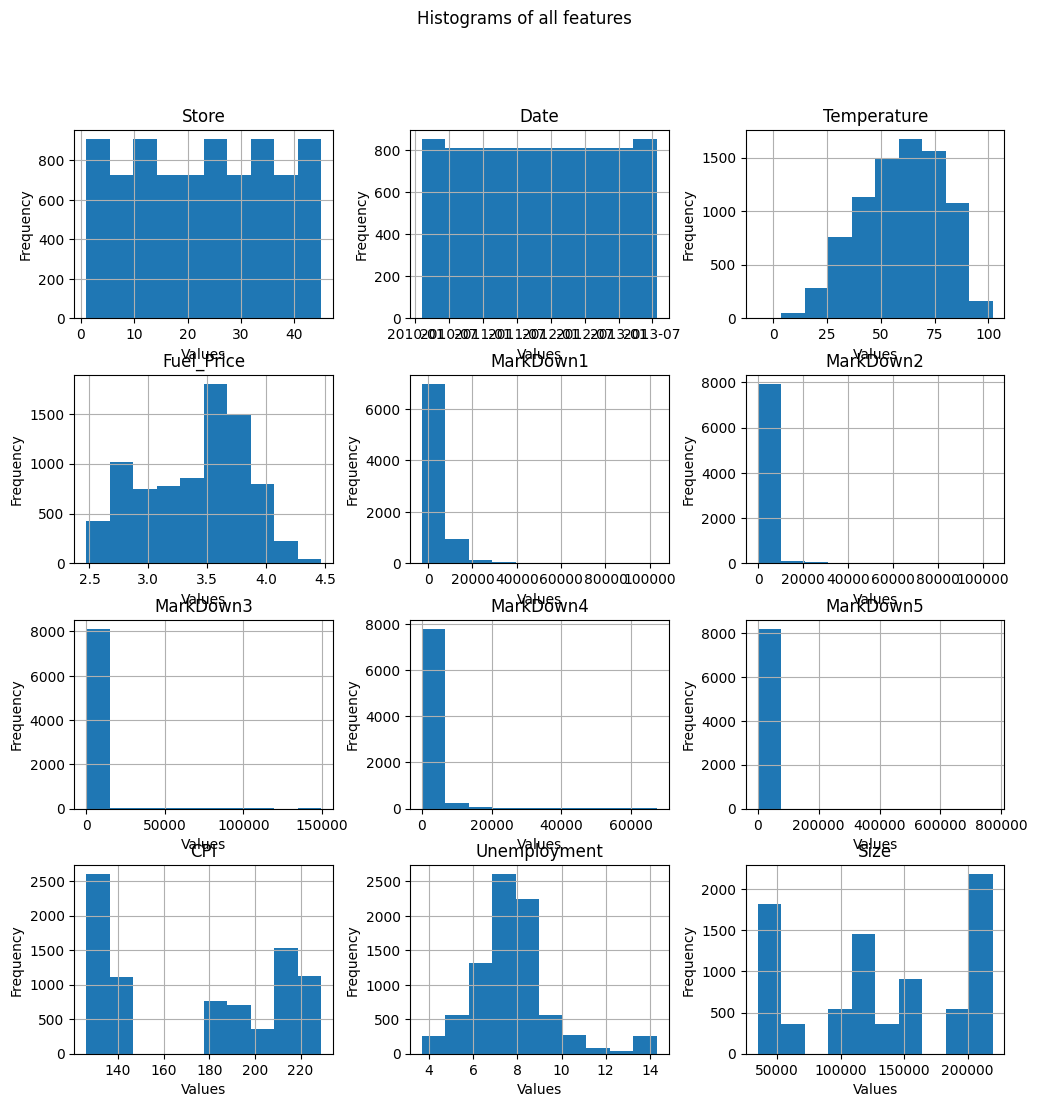

In [40]:
# create a histogram for each feature using pandas
ax = features.hist(figsize=(12,12))

# set the labels and title
for axes in ax.flatten():
    axes.set_xlabel("Values")
    axes.set_ylabel("Frequency")
plt.suptitle("Histograms of all features")

# show the plot
plt.show()

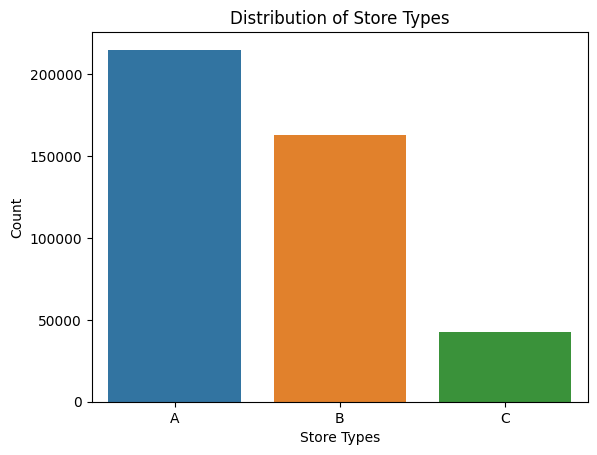

In [41]:

# create a bar plot of the distribution of Store Types
sns.countplot(x='Type', data=train)

# add labels and title to the plot
plt.xlabel('Store Types')
plt.ylabel('Count')
plt.title('Distribution of Store Types')

# show the plot
plt.show()

# The majority of the Walmart stores included in this study belong to Type ‘A’.

In [42]:
grouped = train.groupby(["Dept", "Store"])
result = grouped.agg({"Dept": 'sum'})
result

Dept
Dept Store      
1    1       143
     2       143
     3       143
     4       143
     5       143
...          ...
99   39     4059
     40     3564
     41     4257
     43      396
     44      198

[3323 rows x 1 columns]

In [43]:
train.duplicated().sum()

0

<ipython-input-44-292249fadabf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


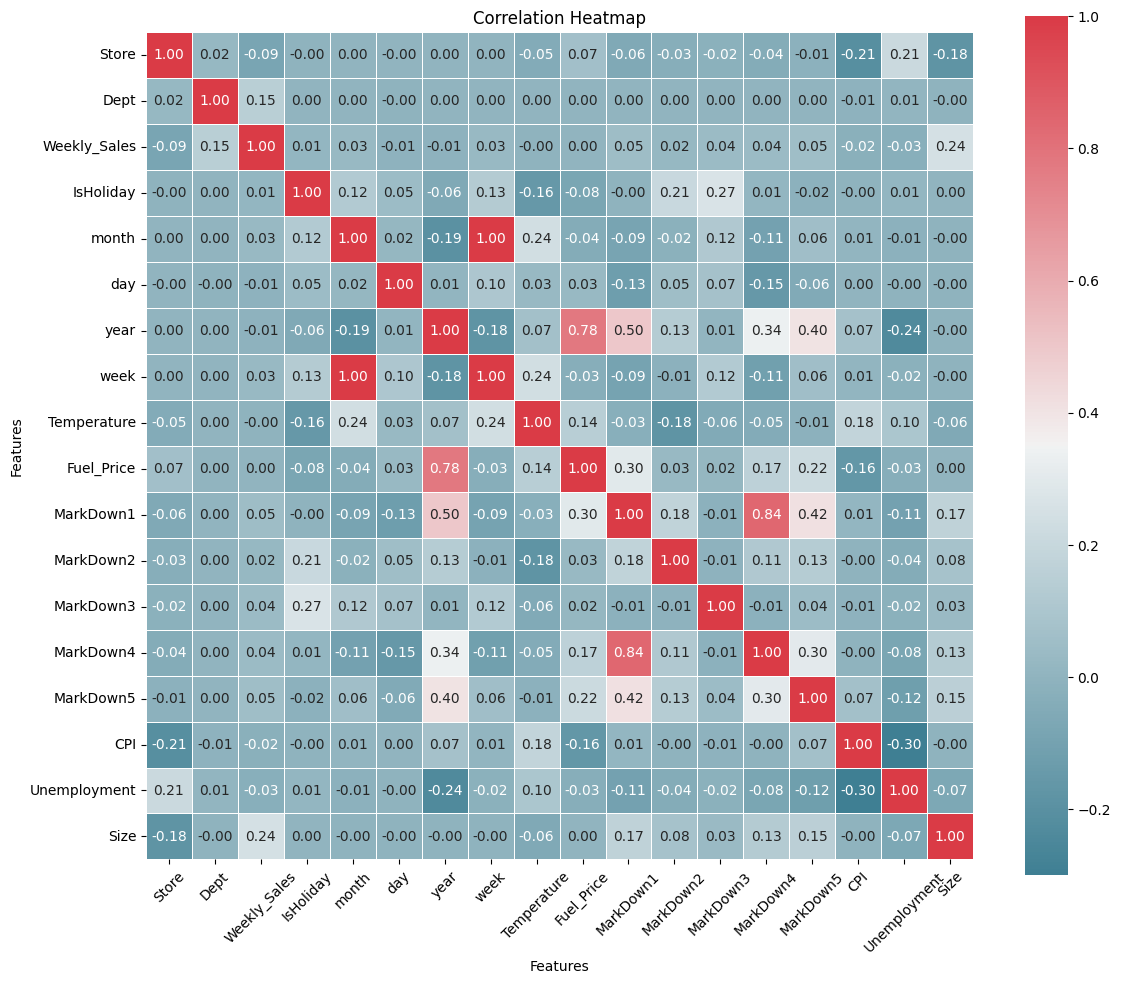

In [44]:
import seaborn as sns
#train = train.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)
corr = train.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap with improved aesthetics
sns.heatmap(corr, annot=True, cmap=cmap, linewidths=0.5, fmt=".2f", square=True)

# Set the title and axis labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the plot layout to prevent the top and bottom heatmap squares from being cut off
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
'''
for col in train.columns:
    # calculate the lower and upper bounds for outliers
    if type(train[col]) == float or type(train[col]) == int:
        q1 = train[col].quantile(0.25)
        q3 = train[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # remove any values outside of the lower and upper bounds
        train = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]

# show the modified DataFrame
print(train)
'''

'\nfor col in train.columns:\n    # calculate the lower and upper bounds for outliers\n    if type(train[col]) == float or type(train[col]) == int:\n        q1 = train[col].quantile(0.25)\n        q3 = train[col].quantile(0.75)\n        iqr = q3 - q1\n        lower_bound = q1 - 1.5 * iqr\n        upper_bound = q3 + 1.5 * iqr\n        # remove any values outside of the lower and upper bounds\n        train = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]\n\n# show the modified DataFrame\nprint(train)\n'

<AxesSubplot:>

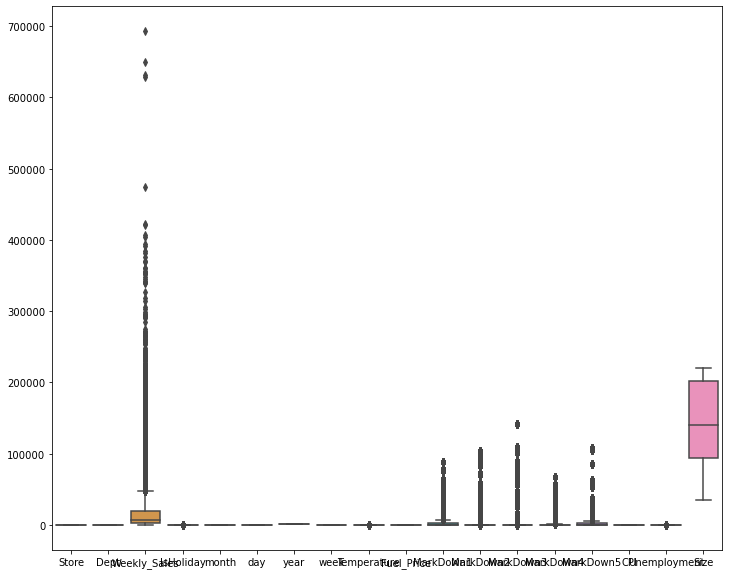

In [ ]:
# Create a boxplot of the variables

plt.figure(figsize=(12, 10))

sns.boxplot(data=train)

In [ ]:
'''

'''

'\n\n'

In [ ]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,month,day,year,week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,2,5,2010,5,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2010-02-05,35,3,2010-02-05,14612.19,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,4,2010-02-05,26323.15,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,5,2010-02-05,36414.63,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,6,2010-02-05,11437.81,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,49,2012-10-26,7770.71,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622
2012-10-26,13,50,2012-10-26,1486.00,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622
2012-10-26,13,52,2012-10-26,4738.93,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622


In [ ]:
train.to_csv('train_combine.csv', index=False)

### Decompostion 

In [ ]:

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
sales = train.groupby(level=0)['Weekly_Sales'].sum()

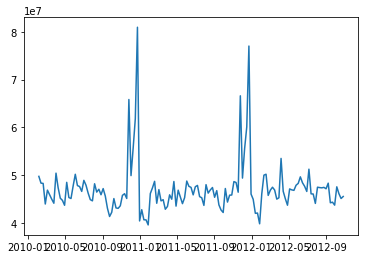

In [ ]:
plt.plot(sales)

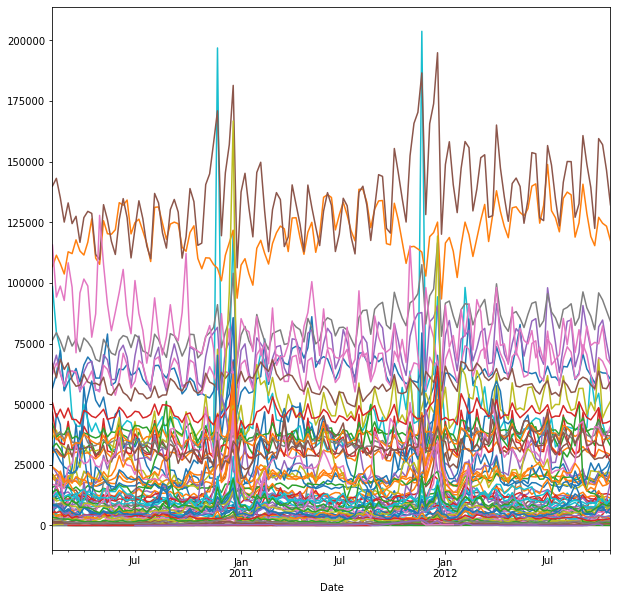

In [ ]:
ts = train[train.Store == 1]
plt.figure(figsize=(10,10))
for i in ts.Dept.unique():
    ts_=ts[ts['Dept']==i]
    ts_['Weekly_Sales'].plot()

<AxesSubplot:xlabel='Date'>

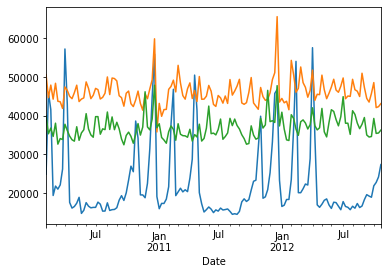

In [ ]:
ts_1=ts[ts.Dept==1]
ts_1['Weekly_Sales'].plot()
ts_2=ts[ts.Dept==2]
ts_2['Weekly_Sales'].plot()
ts_3=ts[ts.Dept==4]
ts_3['Weekly_Sales'].plot()

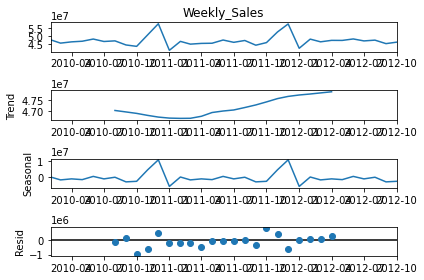

In [ ]:
sm.tsa.seasonal_decompose(sales.resample('MS').mean(), model='additive').plot()
#plt.savefig('plots/seasonal_decompose.png')
plt.show()

In [ ]:
sales_df['month'] = sales_df.index.month
sales_df['year'] = sales_df.index.year

<AxesSubplot:xlabel='month'>

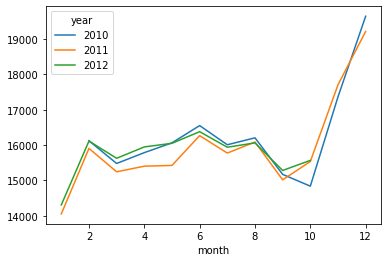

In [ ]:
monthly_sales = pd.pivot_table(train, values = "Weekly_Sales", columns = "year", index = "month")

monthly_sales.plot()

In [ ]:
week_sales = pd.pivot_table(train, values = "Weekly_Sales",index = "week")
week_sales

,Weekly_Sales
week,
1,14928.038770
2,14095.340803
3,14133.401201
4,13569.438615
5,16073.160123
6,16418.777595
7,16517.946636
8,15177.816351
9,15867.717934


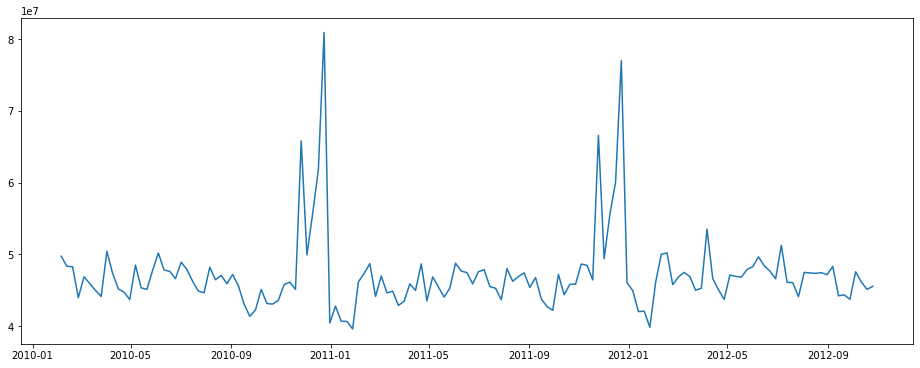

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(sales)
plt.show()

In [ ]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,month,day,year,week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,2,5,2010,5,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2010-02-05,35,3,2010-02-05,14612.19,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,4,2010-02-05,26323.15,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,5,2010-02-05,36414.63,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,6,2010-02-05,11437.81,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,49,2012-10-26,7770.71,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622
2012-10-26,13,50,2012-10-26,1486.00,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622
2012-10-26,13,52,2012-10-26,4738.93,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622


### Detrend Dataset

Since the value of weekly sales range from 0 to 700000, which means weekly sales contain large values. I prefer to use log function to standardize the variance by compressing large values and expanding small values.

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(sales)[1]

2.6746067888257997e-07

In [ ]:
sales_log = np.log(sales)

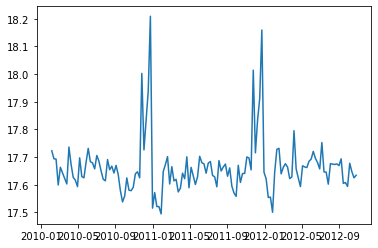

In [ ]:
adfuller(sales_log)[1]
plt.plot(sales_log)

In [ ]:
sales_diff2 = sales.diff(2)
sales_diff2.dropna(inplace=True)
adfuller(sales_diff2)[1]

1.535291953258934e-10

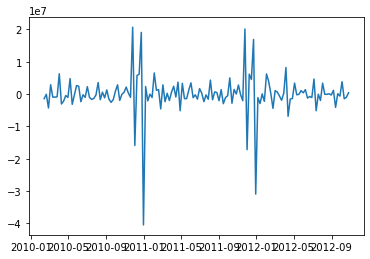

In [ ]:
plt.plot(sales_diff1)

In [ ]:
sales_log_diff = sales_log.diff(2)
sales_log_diff.dropna(inplace=True)
adfuller(sales_log_diff)[1]

3.0550187492241946e-11

In [ ]:
sales_log_diff1 = sales_log.diff(1)
sales_log_diff1.dropna(inplace=True)
adfuller(sales_log_diff1)[1]

3.0149833269479157e-09

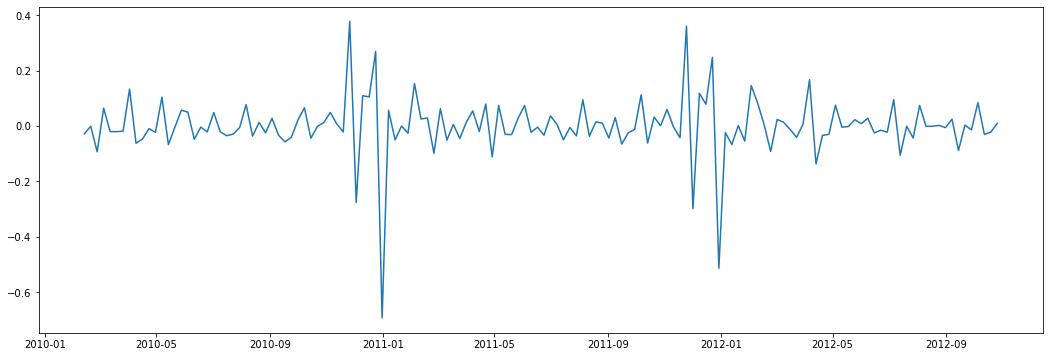

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(sales_log_diff1)

In [ ]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# split the dataset into training and test
select_data = int(0.9*len(sales_log_diff1))
arima_train = sales_log_diff1[:select_data]
arima_test = sales_log_diff1[select_data:]

<Figure size 1440x432 with 0 Axes>

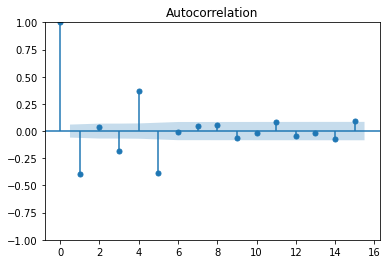

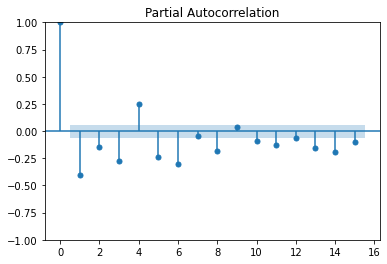

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plt.figure(figsize=(20,6))
plot_acf(arima_train, lags=15, alpha=0.5)  # lag 1 3 4 5
plt.show()

# Plot PACF
plot_pacf(arima_train, lags=15, alpha=0.5)
plt.show()

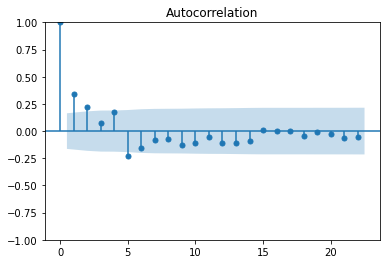

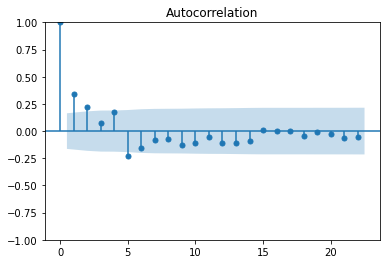

In [ ]:
plot_acf(sales)

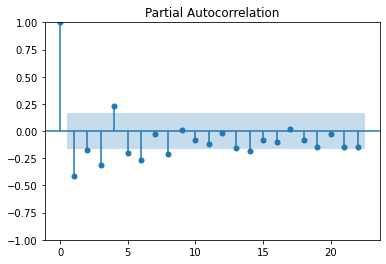

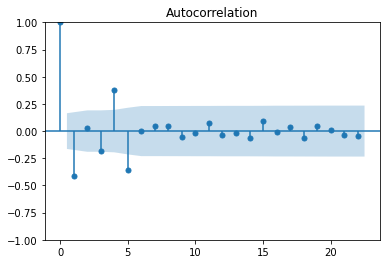

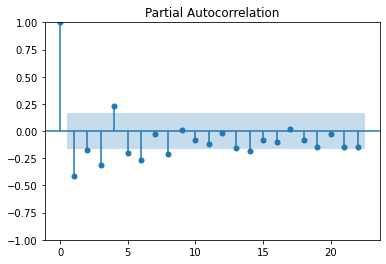

In [ ]:
dff1 = sales.diff()
plot_acf(dff1.dropna())
plot_pacf(dff1.dropna())

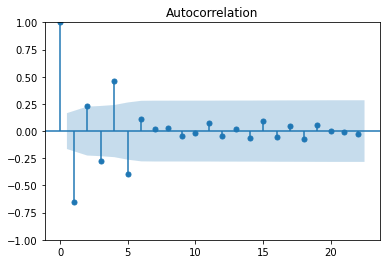

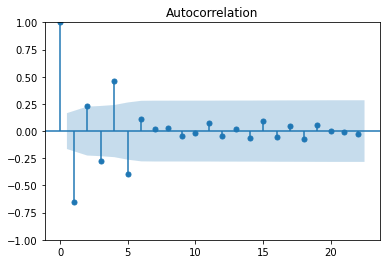

In [ ]:
dff2 = sales.diff().diff()
plot_acf(dff2.dropna())

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-182.453, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-180.679, Time=0.07 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-178.797, Time=0.47 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-180.695, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=-178.862, Time=0.54 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-209.511, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-207.754, Time=0.19 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-206.339, Time=0.70 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-207.789, Time=0.13 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-204.686, Time=1.27 sec
 ARIMA(0,0,1)(2,0,0)

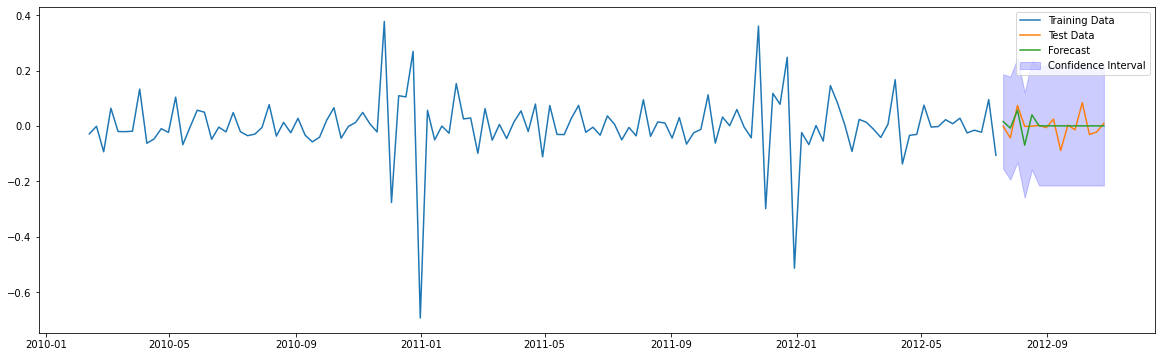

In [ ]:
import pandas as pd
import pmdarima as pm
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

auto_arima_model = auto_arima(arima_train,trace=True,seasonal=True,stationary = True,
                  information_criterion='aic',stepwise=False, suppress_warnings=True,m=12,
                  error_action='ignore',approximation = False)
auto_arima_model.fit(arima_train)

# Forecast the next 12 months
forecast, conf_int = auto_arima_model.predict(n_periods=len(arima_test), return_conf_int=True)

# Plot the forecast
plt.figure(figsize=(20,6))
plt.plot(arima_train.index, arima_train, label='Training Data')
plt.plot(arima_test.index, arima_test, label='Test Data')
plt.plot(arima_test.index, forecast, label='Forecast')
plt.fill_between(arima_test.index, conf_int[:, 0], conf_int[:, 1], alpha=0.2, color='blue', label='Confidence Interval')

plt.legend()
plt.show()

In [ ]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  127
Model:               SARIMAX(0, 0, 5)   Log Likelihood                 128.088
Date:                Tue, 16 May 2023   AIC                           -242.176
Time:                        15:22:21   BIC                           -222.267
Sample:                    02-12-2010   HQIC                          -234.087
                         - 07-13-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.001      0.301      0.764      -0.001       0.002
ma.L1         -0.4361      0.084     -5.191      0.000      -0.601      -0.271
ma.L2         -0.1338      0.090     -1.482      0.138      -0.311       0.043
ma.L3         -0.1878      0.069     -2.739      0.006      -0.322      -0.053
ma.L4          0.3089      0.065      4.724      0.000       0.181       0.437
ma.L5         -0.5100      0.096     -5.288      0.000      -0.699      -0.321
sigma2         0.0076      0.001      7.664      0.000       0.006       0.010
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):               171.62
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                             1.03
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
np.log(sales)

Date
2010-02-05    17.722539
2010-02-12    17.693704
2010-02-19    17.692485
2010-02-26    17.599028
2010-03-05    17.662946
                ...    
2012-09-28    17.593676
2012-10-05    17.677651
2012-10-12    17.646950
2012-10-19    17.624890
2012-10-26    17.634198
Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
# Reverse differencing
forecast_values = []
prev_value = sales_log[select_data:].iloc[0]
for diff in forecast:
    forecast_value = prev_value + diff
    forecast_values.append(forecast_value)
    prev_value = forecast_value

# Invert the  logarithmic transformation
forecast_values = np.exp(forecast_values)

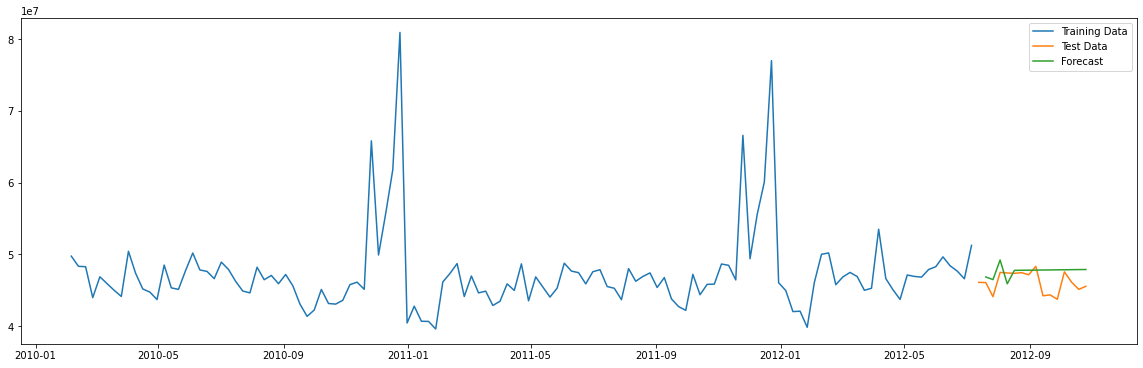

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(sales[:select_data].index, sales[:select_data], label='Training Data')
plt.plot(sales[select_data:].index, sales[select_data:], label='Test Data')
plt.plot(forecast.index, forecast_values, label='Forecast')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


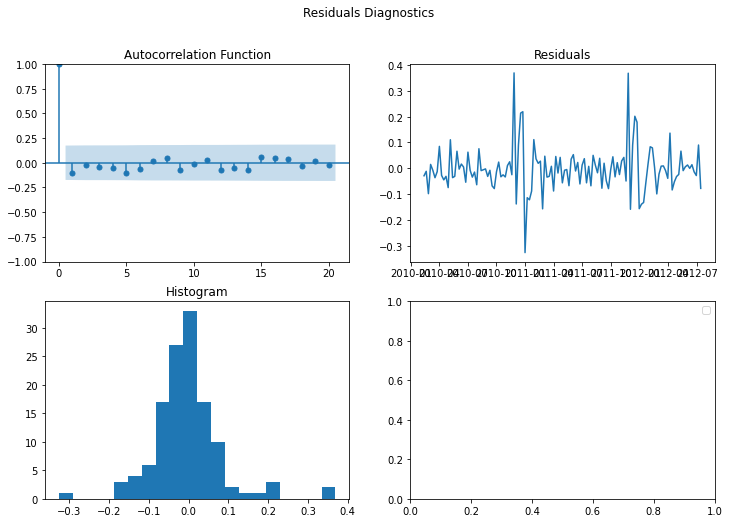

In [ ]:
# Plot the residuals diagnostics
residuals = auto_arima_model.resid()
fig, ax = plt.subplots(2,2,figsize=(12,8))
fig.suptitle('Residuals Diagnostics')
plot_acf(residuals, ax=ax[0,0], lags=20)
ax[0,0].set_title('Autocorrelation Function')
ax[0,1].plot(residuals)
ax[0,1].set_title('Residuals')
ax[1,0].hist(residuals, bins=20)
ax[1,0].set_title('Histogram')

plt.legend()
plt.show()

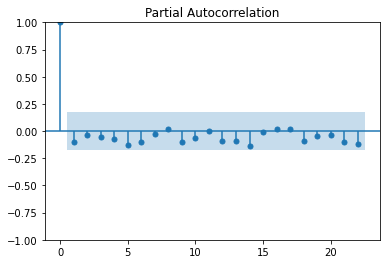

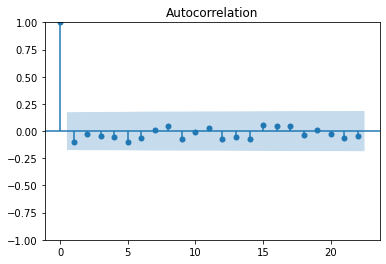

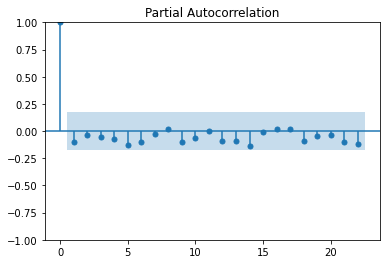

In [ ]:
plot_acf(auto_arima_model.resid())
plot_pacf(auto_arima_model.resid())


In [ ]:
sales_df

,Weekly_Sales,month,year
Date,,,
2010-02-05,49750875.98,2,2010
2010-02-12,48336800.10,2,2010
2010-02-19,48277902.33,2,2010
2010-02-26,43970440.65,2,2010
2010-03-05,46872715.16,3,2010
...,...,...,...
2012-09-28,43735713.56,9,2012
2012-10-05,47567053.49,10,2012
2012-10-12,46128909.98,10,2012


In [ ]:
sales

Date
2010-02-05    49750875.98
2010-02-12    48336800.10
2010-02-19    48277902.33
2010-02-26    43970440.65
2010-03-05    46872715.16
                 ...     
2012-09-28    43735713.56
2012-10-05    47567053.49
2012-10-12    46128909.98
2012-10-19    45122443.96
2012-10-26    45544379.53
Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
mse = ((sales_df.loc[arima_test.index,'Weekly_Sales'] - forecast_values) ** 2).mean()
mse

4705750562162.265

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(sales_df.loc[arima_test.index,'Weekly_Sales'], forecast_values)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1774602.245472251


### Random Forest

In [ ]:
# WMAE Function Create
def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights * abs(targets - predictions)) / (np.sum(weights)))

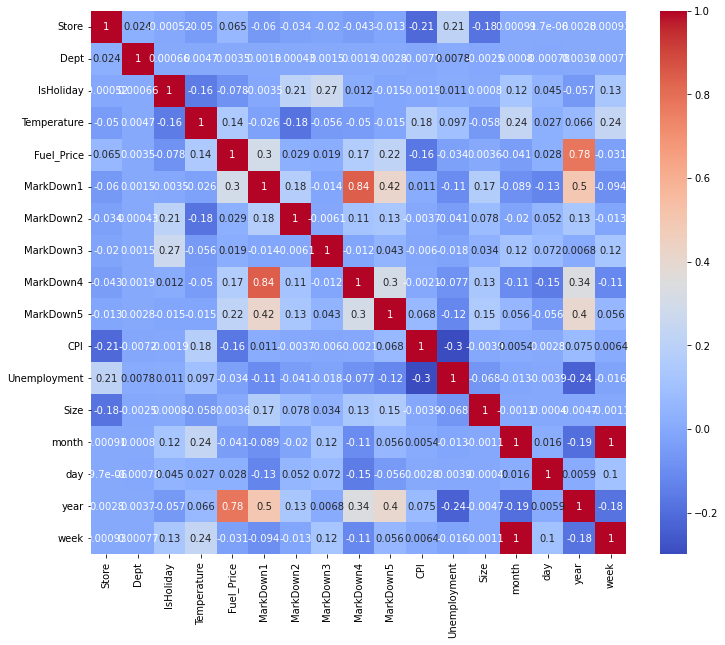

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns = trian_copy.columns.to_list()
columns.remove('Weekly_Sales')
inputs = train[input_column].copy()
for col in columns:
    if type(train[col]) == int or type(train[col]) == float:
        scaler = MinMaxScaler().fit(train[col])
        inputs[col] = scaler.transform(inputs[col])
    else:
        inputs[col] = train[col]

corr = inputs.corr()

# set the figure size
plt.figure(figsize=(12, 10))

# create a heatmap using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')

# show the plot
plt.show()

In [ ]:
inputs = inputs.drop("Date",axis=1)
inputs['Type'] = inputs['Type'].replace({'A': 0, 'B': 1,'C':2})
inputs['IsHoliday'] = inputs['IsHoliday'].replace({'False': 0, 'True': 1})

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, train['Weekly_Sales'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
# Create the random forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model on the training data
rf.fit(X_train, Y_train)

# Make predictions on the test data
preds = rf.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(Y_test, preds)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 4035.45


In [ ]:
importance = rf.feature_importances_

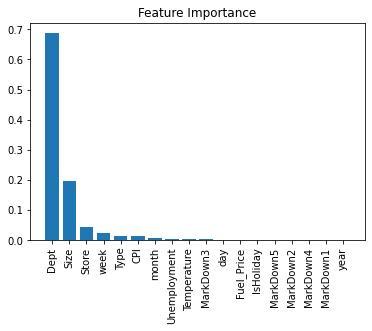

In [ ]:
indices = importance.argsort()[::-1]
plt.title('Feature Importance')
names = [inputs.columns[i] for i in indices]
plt.bar(range(inputs.shape[1]), importance[indices])
plt.xticks(range(inputs.shape[1]), names, rotation=90)
plt.show()

In [45]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,month,day,year,week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,2,5,2010,5,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2010-02-05,35,3,2010-02-05,14612.19,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,4,2010-02-05,26323.15,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,5,2010-02-05,36414.63,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
2010-02-05,35,6,2010-02-05,11437.81,False,2,5,2010,5,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,49,2012-10-26,7770.71,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622
2012-10-26,13,50,2012-10-26,1486.00,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622
2012-10-26,13,52,2012-10-26,4738.93,False,10,26,2012,43,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622


In [46]:
train_store1 = train[train.Store == 1]
train_store1 = train_store1.iloc[:,3:4].values
train_store1

array([[24924.5 ],
       [19484.03],
       [ 1409.34],
       ...,
       [43134.88],
       [27390.81],
       [17918.31]])

In [47]:
len(train_store1)

10226

In [55]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_store1 = sc.fit_transform(train_store1)

X_train = []
Y_train = []
for i in range(21, len(train_store1)):
    X_train.append(train_store1[i-21:i, 0])
    Y_train.append(train_store1[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Splitting the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle=False)


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [59]:
regressor = Sequential()
regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(LSTM(units = 50))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 10, batch_size = 64, shuffle=False)

Epoch 1/10
128/128 [==============================] - 14s 53ms/step - loss: 0.0180
Epoch 2/10
128/128 [==============================] - 5s 38ms/step - loss: 0.0159
Epoch 3/10
128/128 [==============================] - 6s 45ms/step - loss: 0.0146
Epoch 4/10
128/128 [==============================] - 6s 45ms/step - loss: 0.0144
Epoch 5/10
128/128 [==============================] - 5s 38ms/step - loss: 0.0144
Epoch 6/10
128/128 [==============================] - 7s 52ms/step - loss: 0.0143
Epoch 7/10
128/128 [==============================] - 5s 38ms/step - loss: 0.0142
Epoch 8/10
128/128 [==============================] - 5s 41ms/step - loss: 0.0142
Epoch 9/10
128/128 [==============================] - 6s 48ms/step - loss: 0.0141
Epoch 10/10
128/128 [==============================] - 5s 38ms/step - loss: 0.0141


In [60]:
# Predict on the validation set
predicted_val = regressor.predict(X_val)

# Scale the predictions back to original range
predicted_val = sc.inverse_transform(predicted_val)
Y_val = sc.inverse_transform(Y_val.reshape(-1, 1))

# Calculate Mean Absolute Error (MAE) for validation set
mae = mean_absolute_error(Y_val, predicted_val)
print("MAE:", mae)

64/64 [==============================] - 3s 16ms/step
MAE: 0.08007104887964123
